**ARBOLES DE DECISION**


In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


In [2]:
#Cargamos el dataset y mostramos las 5 primeras filas
data= pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Mostramos la contidad de filas y columnas pertenecientes a la dataset

In [4]:
data.shape

(1599, 12)

In [5]:
#Mostramos los valores minima, promedio, conteo, máximo...

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Validamos valores sin asingar, nos arroja que ninguno de los campos posee valores sin asignar.

In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#Usamos el variable quality "calidad" como variable principal del dataset, en el siguiente grafico de barras podemos observar la calidad del vino respecto a su cantidad de registros.

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

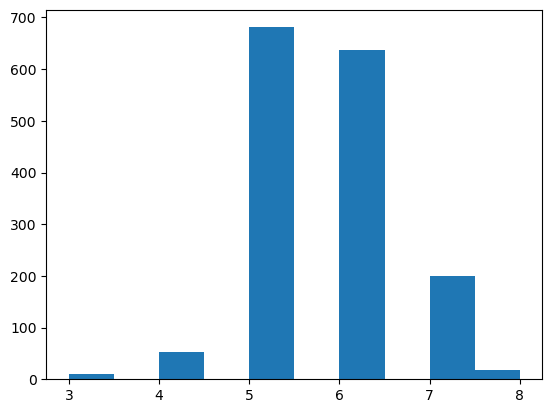

In [10]:
plt.hist(data.quality)

<Axes: >

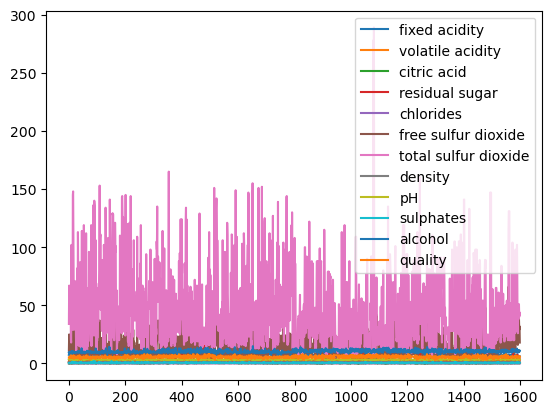

In [11]:
data.plot()

In [ ]:
#Analisis de cada variable.

<Axes: xlabel='total sulfur dioxide'>

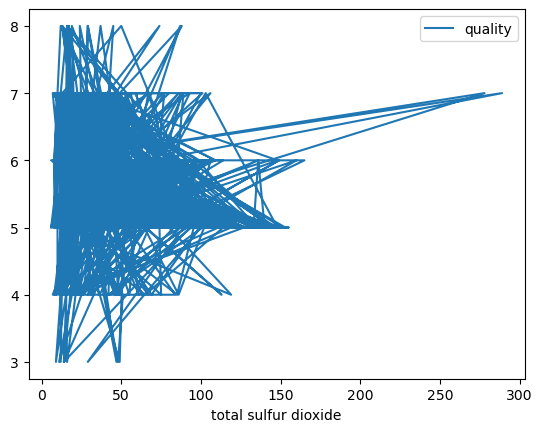

In [12]:
data.plot(x="total sulfur dioxide", y="quality")

<Axes: xlabel='fixed acidity'>

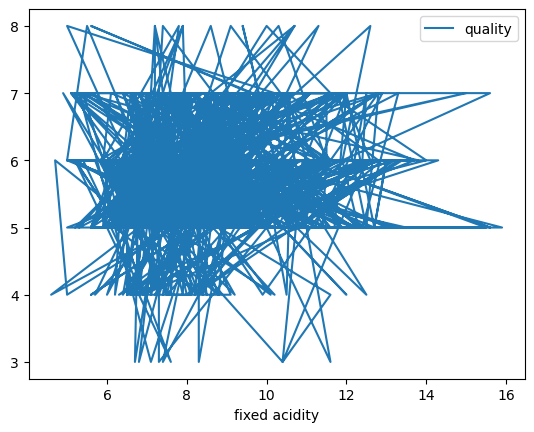

In [13]:
data.plot(x="fixed acidity", y="quality")

<Axes: xlabel='pH'>

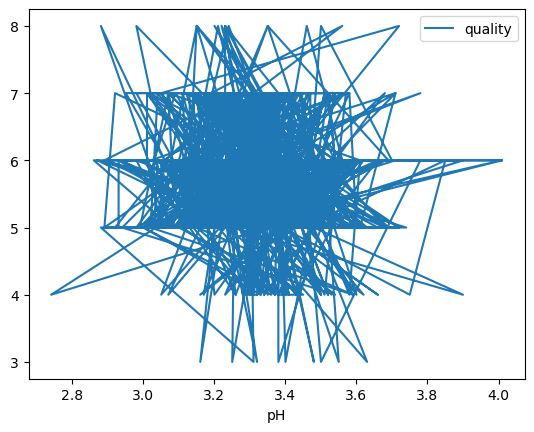

In [14]:
data.plot(x="pH", y="quality")

<Axes: xlabel='density'>

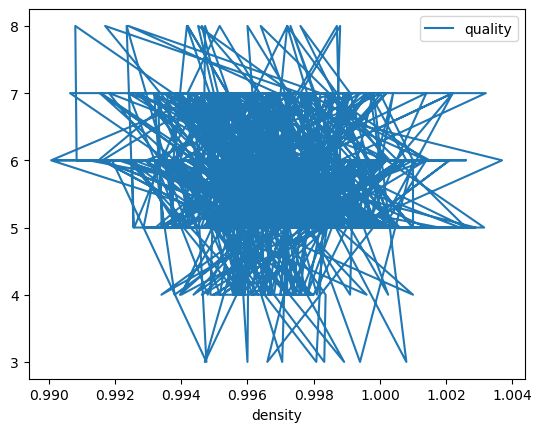

In [15]:
data.plot(x="density", y="quality")

<Axes: xlabel='free sulfur dioxide'>

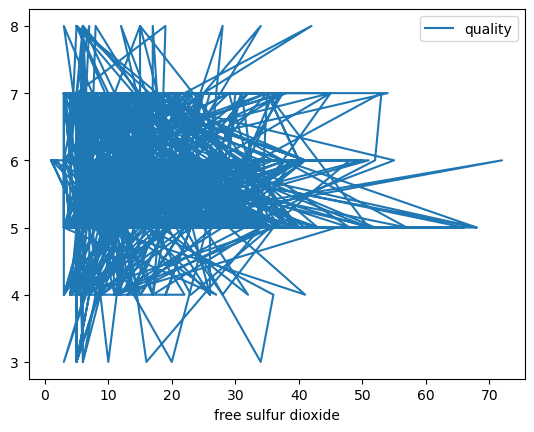

In [16]:
data.plot(x="free sulfur dioxide", y="quality")

<Axes: xlabel='chlorides'>

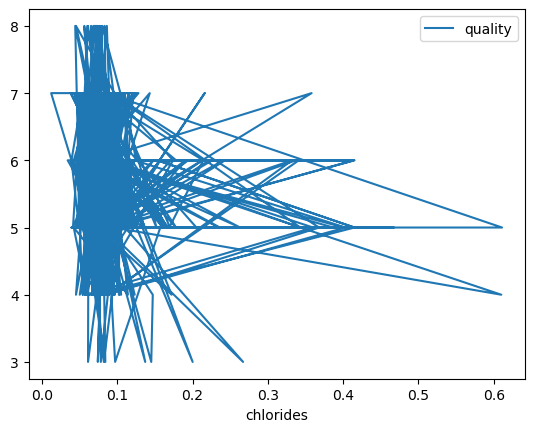

In [17]:
data.plot(x="chlorides", y="quality")

<Axes: xlabel='residual sugar'>

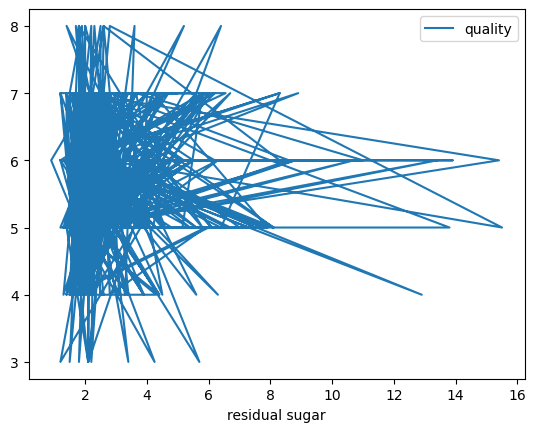

In [18]:
data.plot(x="residual sugar", y="quality")

<Axes: xlabel='alcohol'>

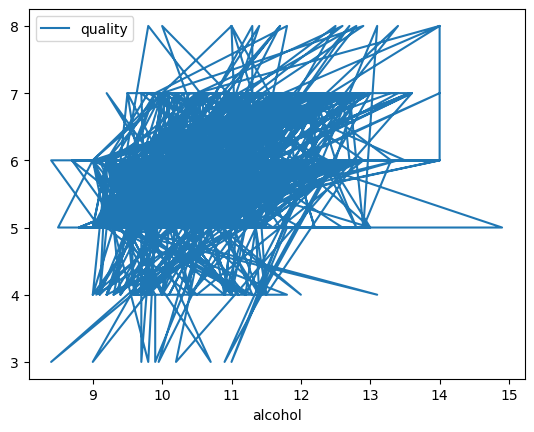

In [19]:
data.plot(x="alcohol", y="quality")

<Axes: xlabel='sulphates'>

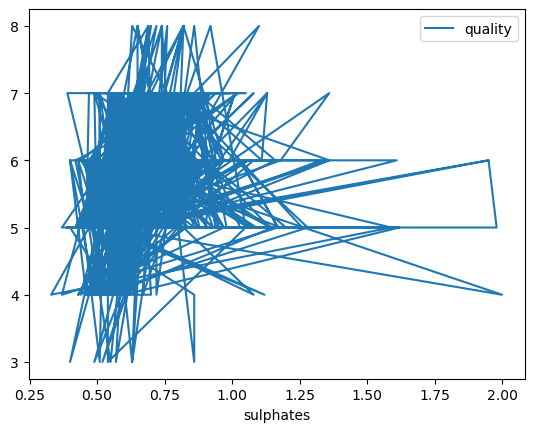

In [20]:
data.plot(x="sulphates", y="quality")

<Axes: xlabel='volatile acidity'>

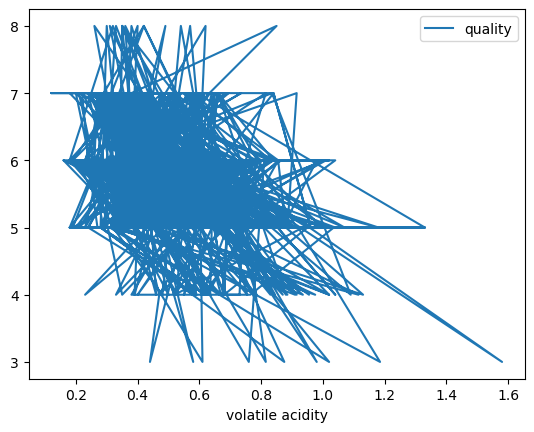

In [21]:
data.plot(x="volatile acidity", y="quality")

<Axes: xlabel='citric acid'>

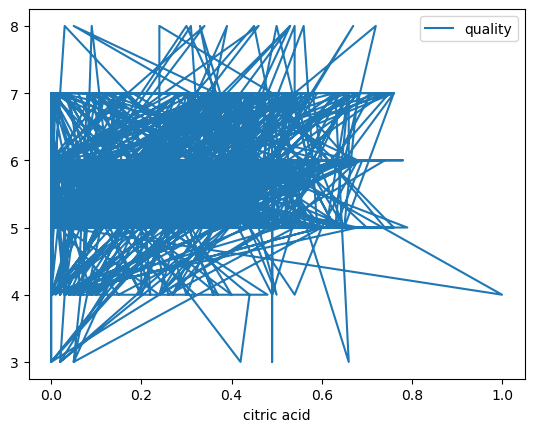

In [22]:
data.plot(x="citric acid", y="quality")

<Axes: xlabel='pH', ylabel='alcohol'>

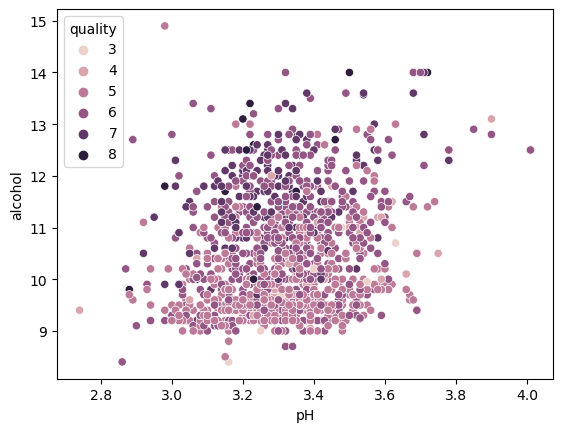

In [23]:
sns.scatterplot(x= "pH", y = "alcohol", hue = "quality", data = data)

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

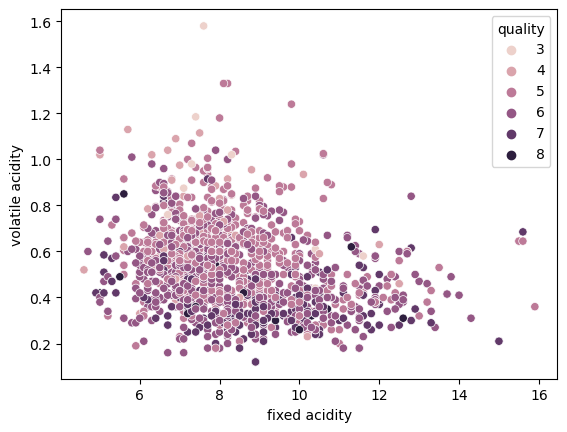

In [24]:
sns.scatterplot(x= "fixed acidity", y="volatile acidity",hue = "quality", data = data)

In [25]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH","sulphates", "alcohol"] 
target_col = ['quality']

In [26]:
predictors = data[predictors_col]
target = data[target_col]

In [27]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [28]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [29]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


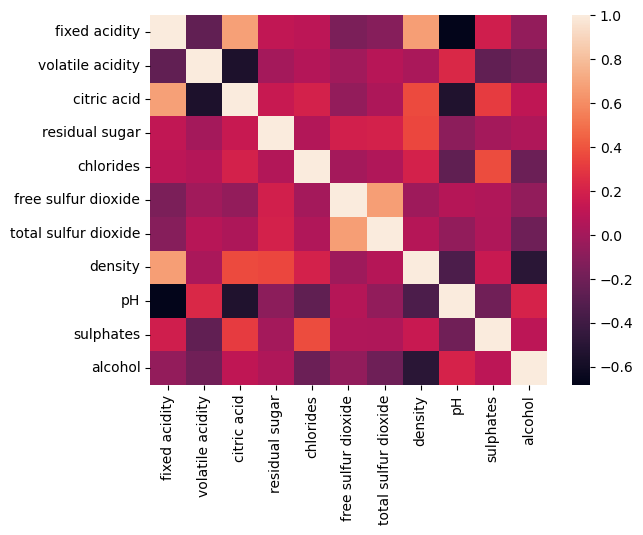

In [30]:
sns.heatmap(corr)
plt.show()

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

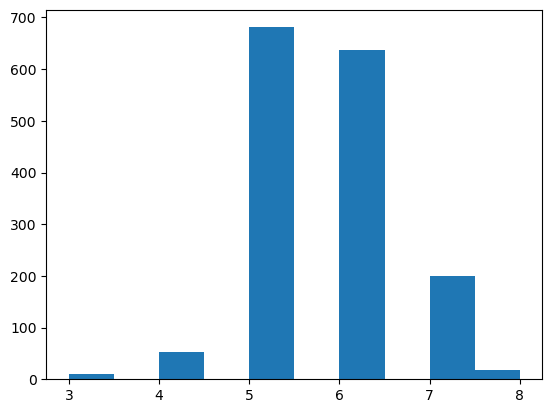

In [31]:
plt.hist(data.quality)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.07, random_state=13)

In [33]:
tree = DecisionTreeClassifier()

In [34]:
arbol = tree.fit(X_train, y_train)

[Text(0.46849944203583793, 0.9761904761904762, 'x[10] <= 9.925\ngini = 0.643\nsamples = 1487\nvalue = [9, 53, 629, 596, 186, 14]'),
 Text(0.17999903833824848, 0.9285714285714286, 'x[9] <= 0.575\ngini = 0.486\nsamples = 634\nvalue = [4, 24, 417, 179, 10, 0]'),
 Text(0.08599393084583494, 0.8809523809523809, 'x[4] <= 0.08\ngini = 0.368\nsamples = 279\nvalue = [2, 16, 217, 43, 1, 0]'),
 Text(0.04256956020002564, 0.8333333333333334, 'x[1] <= 0.42\ngini = 0.463\nsamples = 126\nvalue = [1, 7, 87, 30, 1, 0]'),
 Text(0.019147753985553705, 0.7857142857142857, 'x[0] <= 6.45\ngini = 0.521\nsamples = 13\nvalue = [0, 1, 4, 8, 0, 0]'),
 Text(0.016412360559046033, 0.7380952380952381, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.021883147412061377, 0.7380952380952381, 'x[4] <= 0.061\ngini = 0.34\nsamples = 10\nvalue = [0, 1, 1, 8, 0, 0]'),
 Text(0.019147753985553705, 0.6904761904761905, 'x[7] <= 0.997\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.016412360559046033,

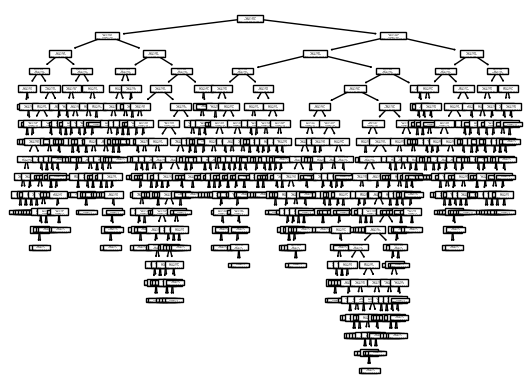

In [35]:
plot_tree(arbol)

In [36]:
arbol.tree_.max_depth

20

In [37]:
predicciones = arbol.predict(X_test)

In [38]:
predicciones


array([7, 5, 5, 5, 6, 5, 7, 7, 5, 6, 5, 6, 5, 6, 7, 6, 6, 7, 6, 7, 5, 6,
       6, 5, 7, 5, 5, 5, 6, 7, 6, 5, 5, 6, 5, 7, 5, 5, 5, 4, 5, 6, 6, 6,
       5, 6, 6, 7, 7, 6, 5, 5, 6, 5, 7, 5, 5, 7, 7, 5, 5, 5, 5, 5, 6, 7,
       6, 6, 5, 5, 6, 5, 6, 6, 5, 4, 5, 5, 5, 5, 7, 7, 6, 5, 5, 5, 7, 5,
       7, 6, 5, 6, 6, 7, 5, 6, 6, 5, 6, 5, 7, 6, 6, 5, 7, 7, 6, 6, 5, 6,
       6, 6], dtype=int64)

In [39]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,4,5,6,7
Actual,,,,
3,0,1,0,0
5,0,36,11,5
6,2,10,24,6
7,0,1,3,9
8,0,0,1,3


In [40]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6160714285714286

**CONCLUSIONES**
Durante el analisis realizado se observo la relacion entre las variables, la variable principal tomada es la variable "quality" calidad, la cual determina la calida del vino rojo desde 1 hasta 10, teniendo esto en cuenta la calidad es más alta para el caso de 10 y la más baja para el caso de 1.No se encontraron datos faltante por lo cual no se realiza un llenado de datos faltantes en el dataset.
Registros de la calidad de vino:
La calidad de vino número 1, tiene 10  registros.
La calidad de vino numero 2, tiene 0   registros.
La calidad de vino numero 3, tiene 53  registros.
La calidad de vino numero 4, tiene 0   registros.
La calidad de vino numero 5, tiene 681 registros.
La calidad de vino numero 6, tiene 0   registros.
La calidad de vino numero 7, tiene 638 registros.
La calidad de vino numero 8, tiene 0   registros.
La calidad de vino numero 9, tiene 199 registros.
La calidad de vino numero 10, tiene 18 registros.
#Correlación tomando la variable calidad como principal:
La calidad que se puede obtener valores de menos del 10 % a un máximo de 60% se pudieron observar usando la correlación de variables y el mapa de calor.
Realizando una grafica entre las variables y la calida se encontraron los siguiente hallazgos destacables:
total sulfure dioxide con valores de 10 a 50 estan relacionados con obtener una calidad mas alta, hasta de 8, valores mas altos hasta 175 que puede obtenerse es de 6 o 5 y valores de mas de 200 la calidad llega a 7.
*residual sugar: valores de 0.4 y 2.2 estan relacionado con una calida de 8.*
alcohol: registra valores relacionado con una calidad de 8 en valores de alcohol entre 9.8 y 14 valores menores a 10 tienen una clara relacion con la baja calidad,, la mayor parte de estos valores se asocia a calidades de entre 5 y 7.*
Sulphates: tienen valores relacionados con una calidad e 8 en valores de 0.40 y 1.10, la mayor parte de estos valores se concentran en obtener calidades de entre 4 y 
*volatile acidity: al ser más alta se observa que influye en obtener una calidad menor.
*fixed acidity:al ser más alta se obsrva que influtye en obenter una calidad menor.
Las demas variables muestran un mayor comportamiento para obtener en mayor parte calidades de entre 4 y 77
#**División y entrenamiento demodelo configurado
*
Se realizó el entrenamiento tomando diferentes valores y buscando la mayor precisión posible, determinando el tamaño del test, a un 7% se obtuvo una precision del 61%, con un test de 5% se llegó a obtener un 71%, aúmentando este valor o disminuyendolo la precision disminuye aúmentando la cantidad de valores erroneos, los valores arrojados por el arbol de decisión muestran que futuras calidades que se pueden obtner estarian entre el 5 y 7, esto se puede asociar con la grafica relacionada a la calidad donde calidades de 8 son bajas e incluso un 10 tiene 0 registros.



